In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
block_plot = False

In [2]:
# Creayte convenience Funactins
def create_linear_data(num_data=100, y_offset=0, slope=1, stddev=.3):

    # Random manual seed for consistency.
    tf.random.set_seed(42)

    # Create some linear data with a small amount of noise.
    X = 10 * tf.random.uniform(shape=[num_data])
    y = y_offset + slope * X + tf.random.normal(stddev=stddev, shape=[num_data])

    X = tf.reshape(X, (len(X), 1))
    y = tf.reshape(y, (len(y), 1))

    return X, y

In [3]:
def plot_data(x, y, xlim=(0,10), ylim=(0,10)):
    plt.figure
    plt.plot(x, y, 'b.')
    plt.xlabel('x')
    plt.ylabel('y'),
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show(block=block_plot)

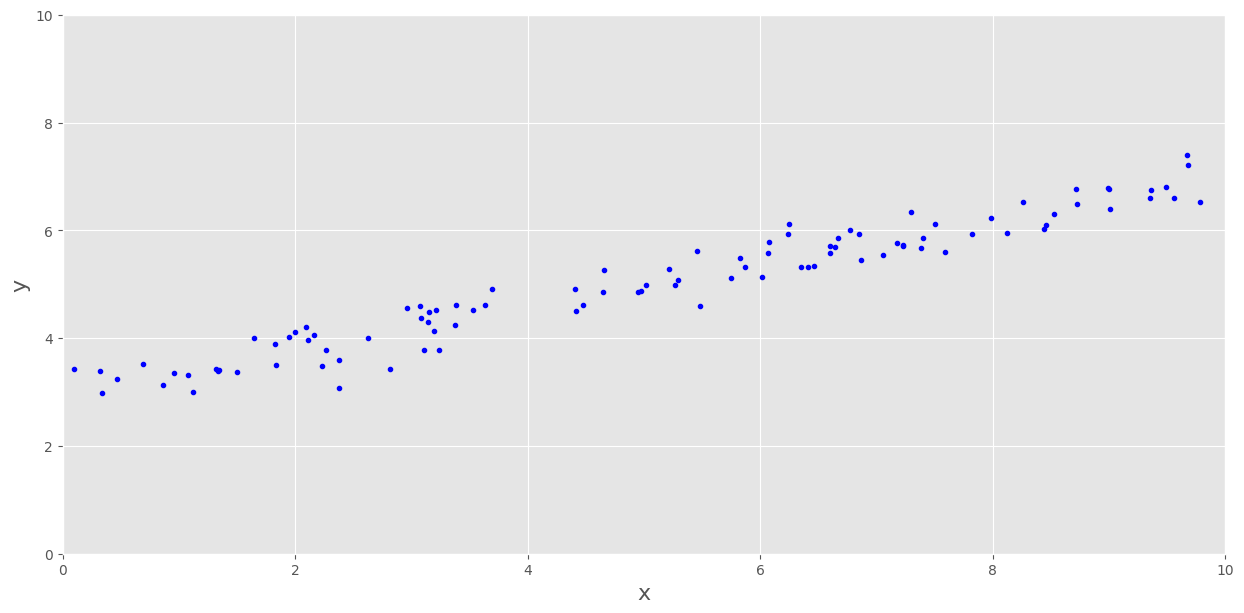

In [4]:
# Generate Linear Data
# Create some data.
y_int = 3
slope = .4
X, y = create_linear_data(y_offset=y_int, slope=slope, stddev=0.3)

plot_data(X, y)

In [5]:
# Implement Normal Equations
def compute_theta(X, y):

    m = X.shape[0] # Number of samples.

    # Concatenate a 1 to the beginning of each feature vector.
    X = tf.concat((tf.ones((m, 1)), X), axis=1)
    y = tf.reshape(y, (m, 1))

    # Solve for theta using the Normal Equations.
    X_T      = tf.transpose(X)
    XT_X     = tf.tensordot(X_T, X, axes=1)
    XT_X_inv = tf.linalg.inv(XT_X)
    XT_y     = tf.tensordot(X_T, y, axes=1)
    theta    = tf.tensordot(XT_X_inv, XT_y, axes=1)

    return theta

In [6]:
# Solve for model parameters (Solpe and y-intercept)
print('Actual Coefficients:\n')
print('Slope: ', slope)
print('Y-Int: ', y_int)
print('\n')

# Compute the parameters (theta) based on the closed-form solution using the Normal Equations.
theta = compute_theta(X, y)

slope = theta[1].numpy()
y_int = theta[0].numpy()

print('Predicted Coefficients:\n')
print('Slope: ', slope[0])
print('Y-int: ', y_int[0])

Actual Coefficients:

Slope:  0.4
Y-Int:  3


Predicted Coefficients:

Slope:  0.39894462
Y-int:  2.992422


In [8]:
# Display the results
def predict_y(X, theta):

    # Adding a bis column og 1 at the neginning of x
    X = tf.concat((tf.ones((X.shape[0], 1)), X), axis=1)
    pred_y = tf.matmul(X, theta)

    return pred_y

Text(0, 0.5, 'y')

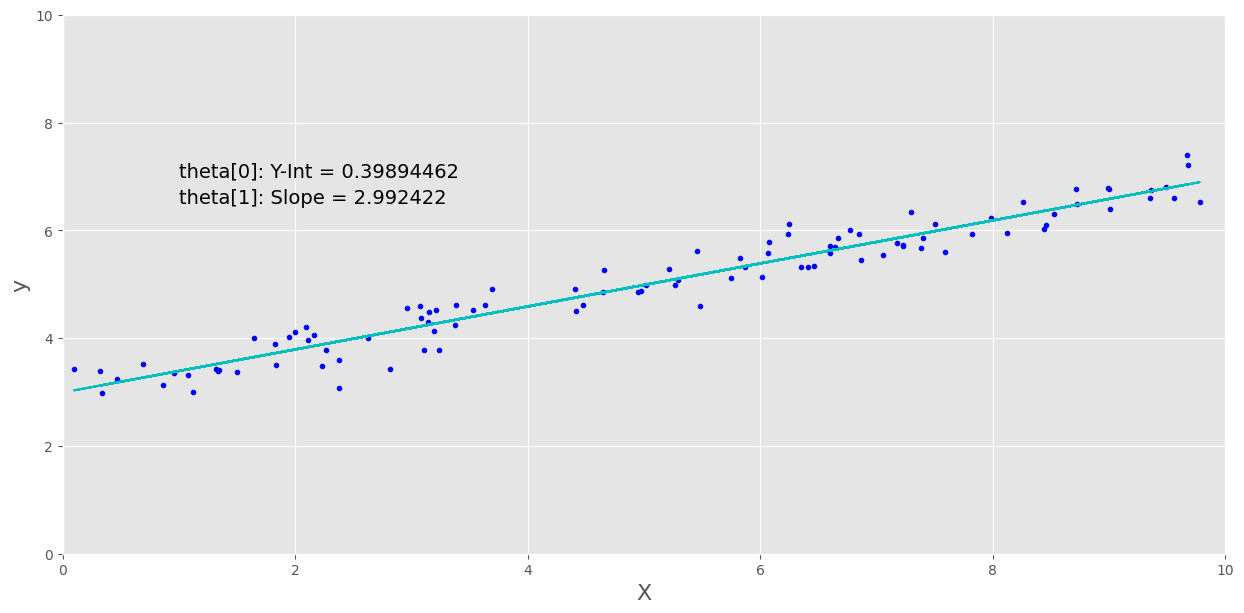

In [9]:
pred_y = predict_y(X, theta)
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.text(1, 7.0, 'theta[0]: Y-Int = ' + str(slope[0]), fontsize=14, family='Consolas')
plt.text(1, 6.5, 'theta[1]: Slope = ' + str(y_int[0]), fontsize=14, family='Consolas')
plt.xlabel('X')
plt.ylabel('y')

In [10]:
# Modeling a Linear eural Network in Keras
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation=None, use_bias=False))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Complie Model
model.compile(loss='mse', optimizer='adam')

In [12]:
# Train the model
history = model.fit(X, y, epochs=50, verbose=0)

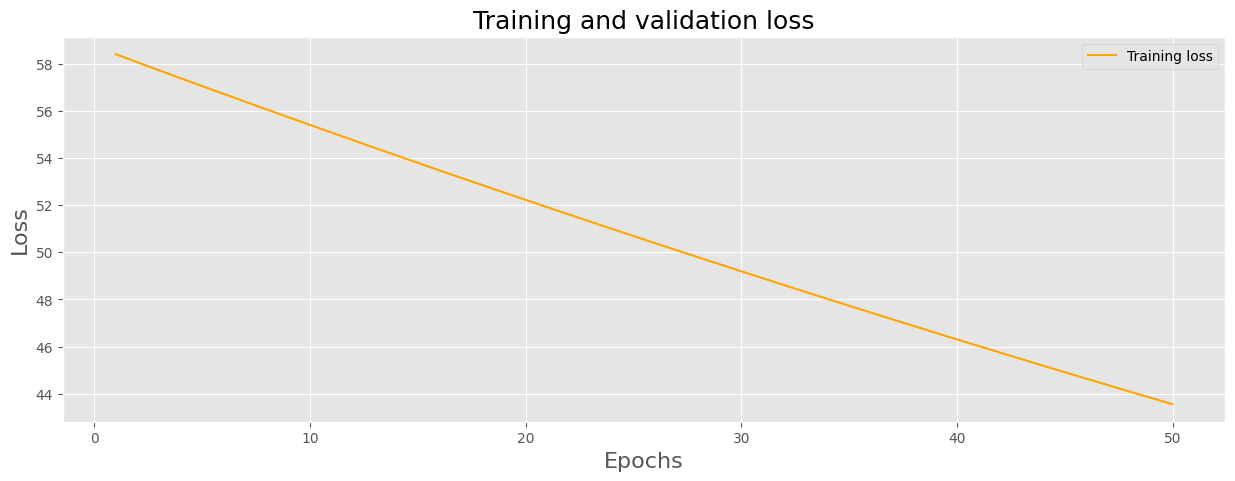

In [13]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
# Predict model parameters and display results
slope = model.layers[0].weights[0]
print('Slope: ', slope[0].numpy())

pred_y = model.predict(X)

Slope:  [-0.2654339]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


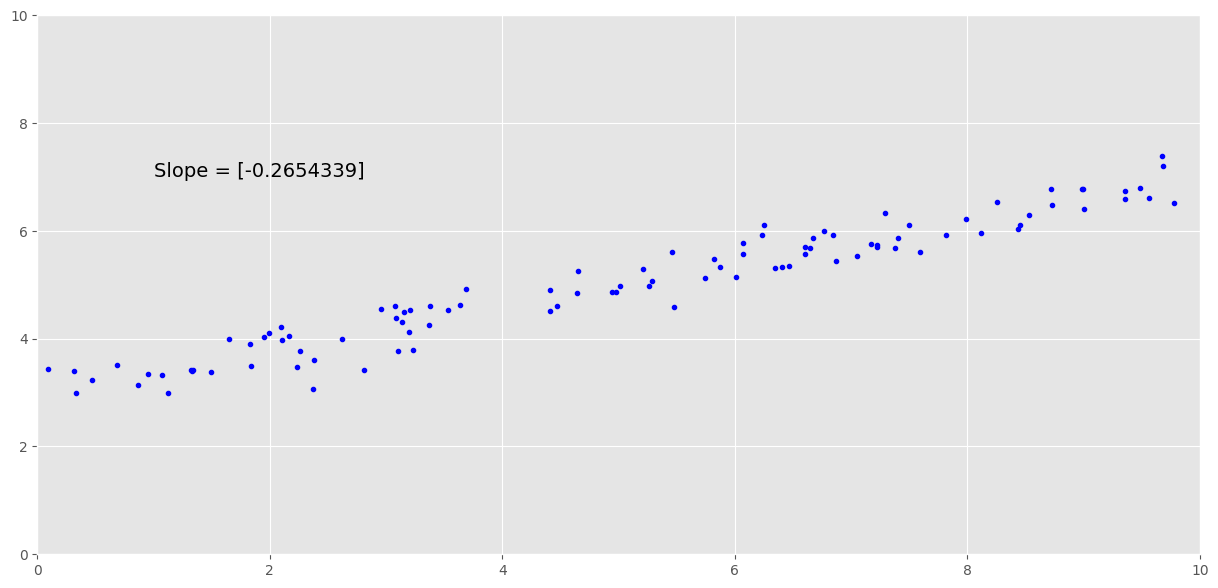

In [15]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize=14, family="Consolas")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [16]:
# Create keras with bias
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,), activation=None, use_bias=True))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
model2.compile(loss='mse', optimizer="adam")

In [19]:
# Train the model
history = model2.fit(X, y, epochs=2000, verbose=0)

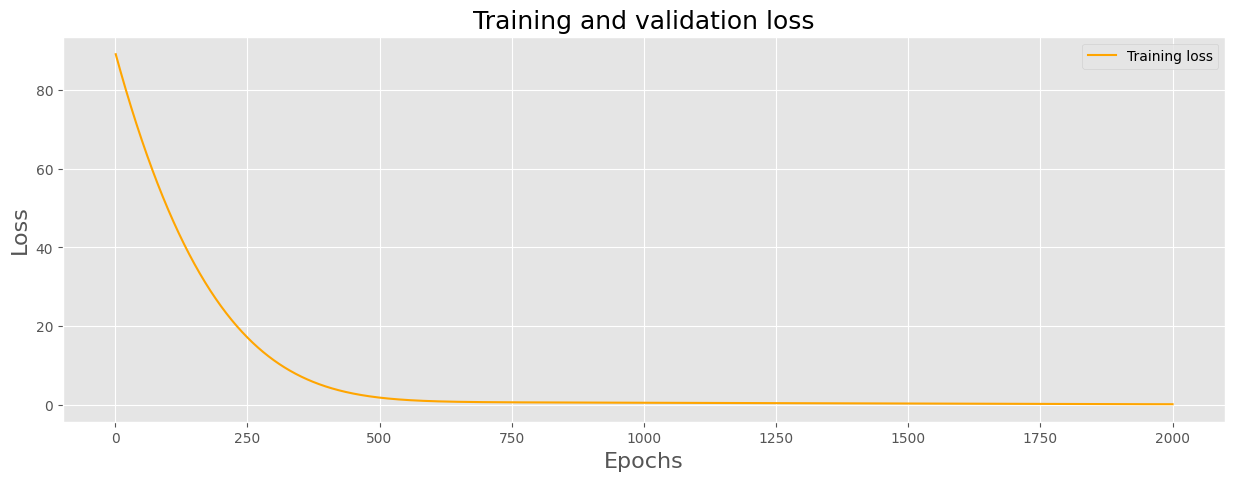

In [20]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
# Predict model and display result
slope = model2.layers[0].weights[0]
y_int = model2.layers[0].weights[1]
print('Slope: ', slope[0].numpy())
print('Y-Int: ', y_int.numpy())

pred_y = model2.predict(X)

Slope:  [0.43472978]
Y-Int:  [2.7609372]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


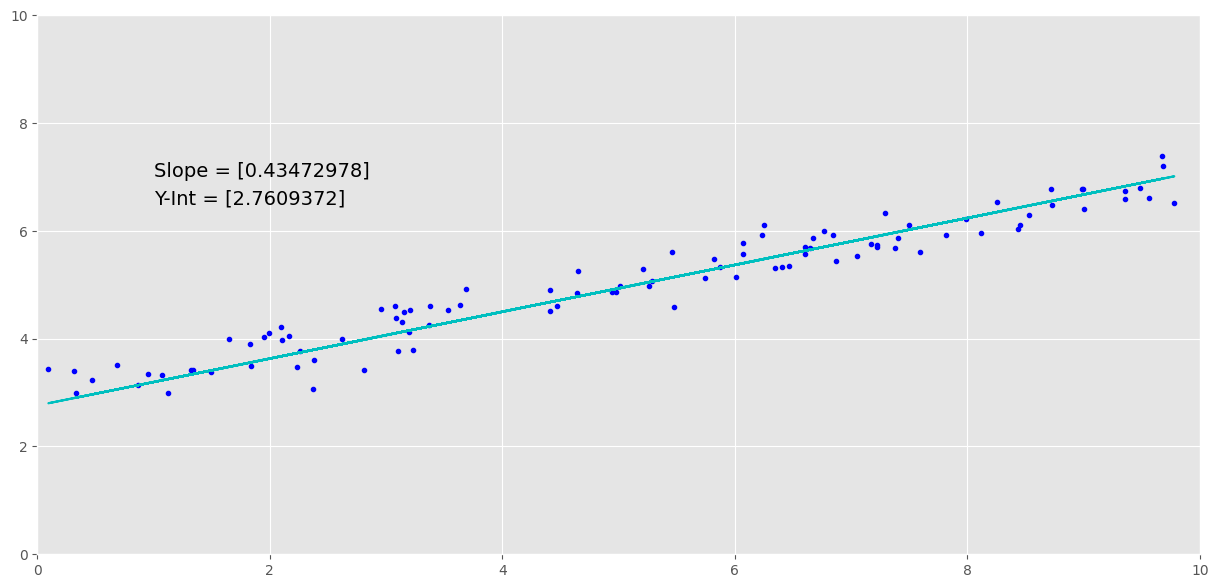

In [22]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize=14, family="Consolas")
plt.text(1, 6.5, 'Y-Int = ' + str(y_int.numpy()),    fontsize=14, family="Consolas")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [23]:
# Non-Linear data with keras
def create_nonlinear_data(xmin=-10, xmax=10, num_data=100, theta_0=0, theta_1=.3, theta_2=.05, noise=.1):

    # Random manual seed for consistency.
    tf.random.set_seed(42)

    X = np.linspace(xmin, xmax, num=num_data)
    y = theta_0 + theta_1*X*np.cos(X) + theta_2*X**2 + noise*np.random.normal(size=num_data)

    X = tf.reshape(X, (len(X), 1))
    y = tf.reshape(y, (len(y), 1))

    return X, y

In [24]:
# Create some data (non-linear function, but linear in the parameters).
theta_0 = -3
theta_1 = .3
theta_2 = .05
X, y = create_nonlinear_data(theta_0=theta_0, theta_1=theta_1, theta_2=theta_2, noise=.3)

# Create two features from the input data that match the functional form of the data we generated above.
Xf = tf.concat((X*tf.math.cos(X), X*X), axis=1)
temp = Xf.numpy()
print('Xf contains two features based on X: ', temp.shape)

Xf contains two features based on X:  (100, 2)


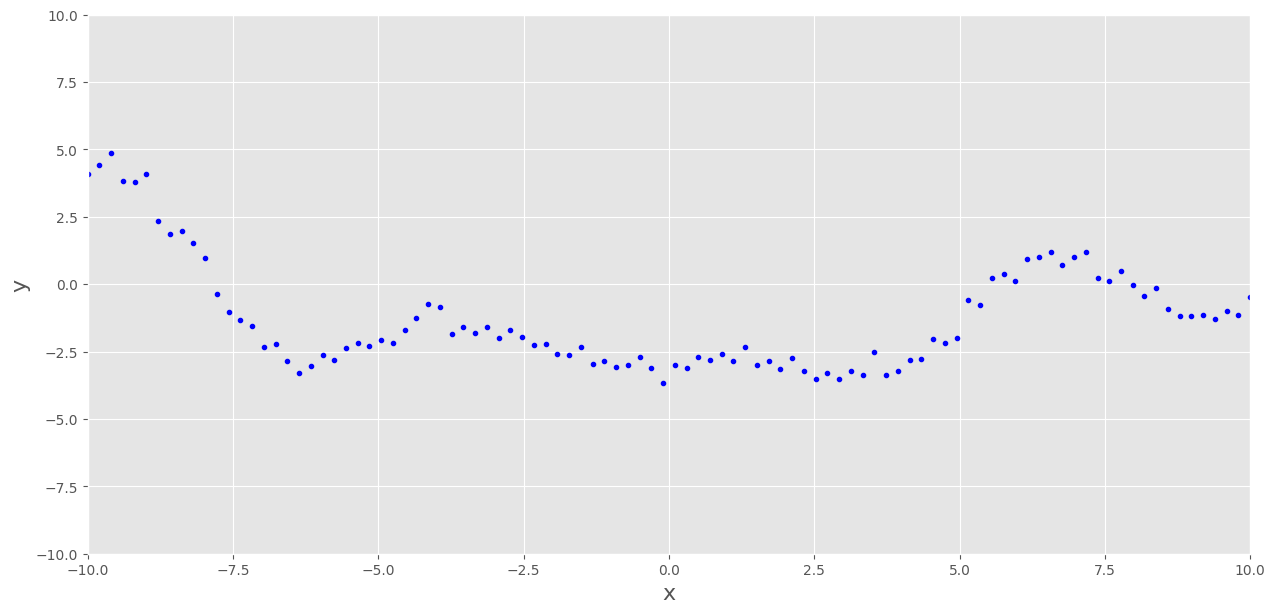

In [25]:
plot_data(X, y, (-10, 10), (-10, 10))

In [26]:
# Create keras
model3 = Sequential()
model3.add(Dense(1, input_shape=(2,), activation=None, use_bias=True))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model3.compile(loss='mse', optimizer="adam")

In [28]:
history = model3.fit(Xf, y, epochs=2000, verbose=0)

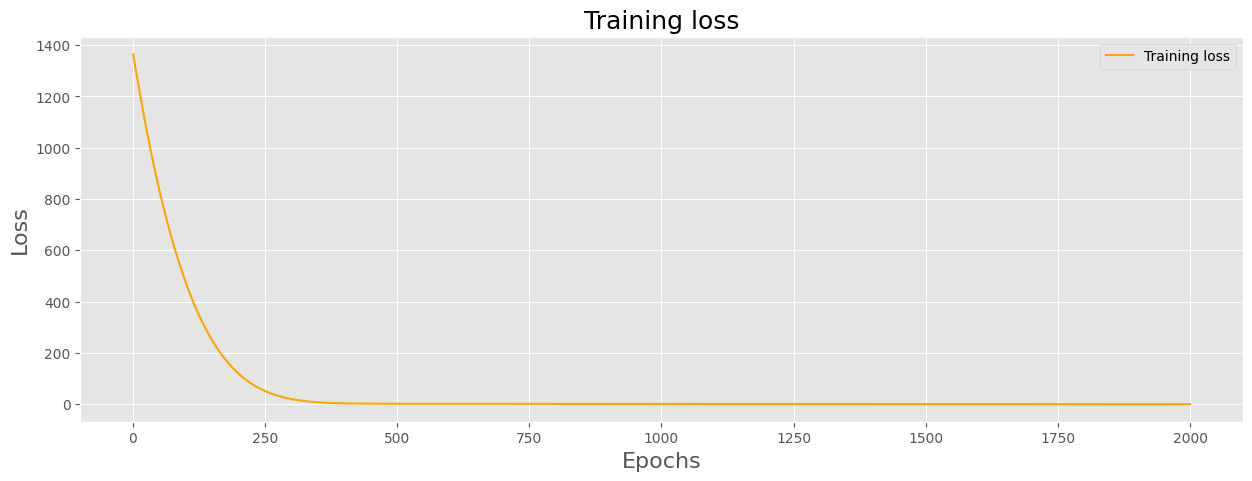

In [29]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [30]:
pred_theta_0 = model3.layers[0].bias[0].numpy();
temp = model3.layers[0].weights[0].numpy();
pred_theta_1 = temp[0]
pred_theta_2 = temp[1]

print('Actual Coefficients:\n')
print('theta_0 = ', theta_0)
print('theta_1 = ', theta_1)
print('theta_2 = ', theta_2)
print('\n')
print('Predicted Coefficients:\n')
print('theta_0 = ', pred_theta_0)
print('theta_1 = ', pred_theta_1[0])
print('theta_2 = ', pred_theta_2[0])

pred_y = model3.predict(Xf)

Actual Coefficients:

theta_0 =  -3
theta_1 =  0.3
theta_2 =  0.05


Predicted Coefficients:

theta_0 =  -2.585108
theta_1 =  0.29537317
theta_2 =  0.04374469
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


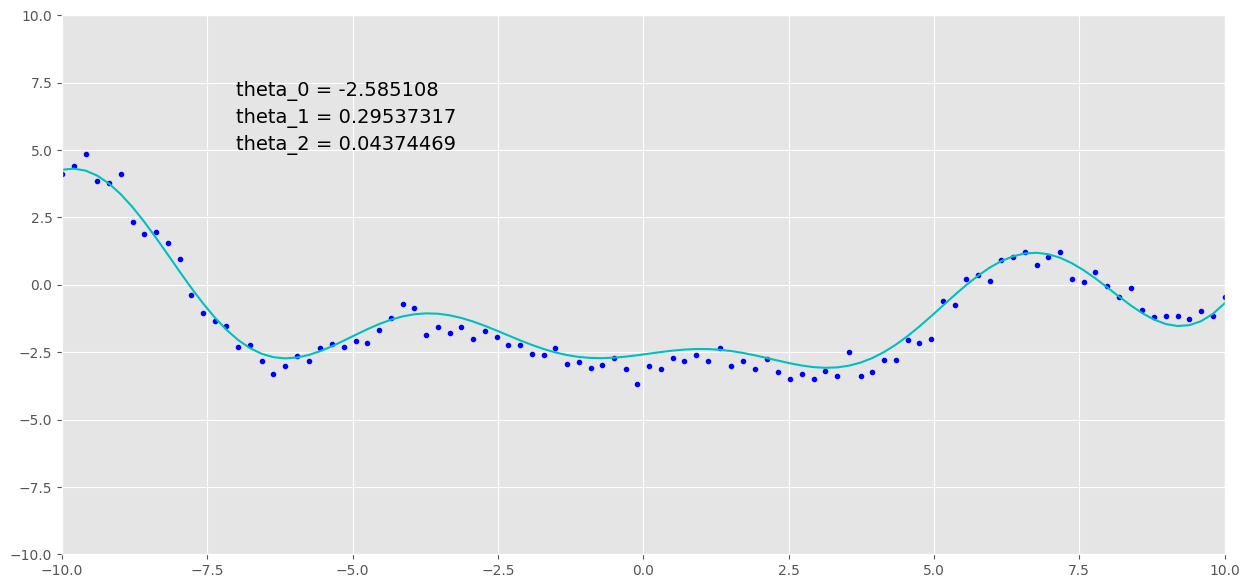

In [31]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(-7, 7.0, 'theta_0 = ' + str(pred_theta_0),    fontsize=14, family="Consolas")
plt.text(-7, 6.0, 'theta_1 = ' + str(pred_theta_1[0]), fontsize=14, family="Consolas")
plt.text(-7, 5.0, 'theta_2 = ' + str(pred_theta_2[0]), fontsize=14, family="Consolas")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()